In [145]:
import pandas as pd
import numpy as np 
import random as rd 
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 



In [146]:
# génération d'un dataset

genes =['gene'+ str(i) for i in range(1,101)]

wt= ['wt'+ str(i) for i in range(1,6)]
ko = ['ko'+str(i) for i in range(1,6)]


In [147]:
# création d'un dataframe

df= pd.DataFrame(columns=wt+ko, index=genes)

for gene in df.index:
    df.loc[gene,'wt1':'wt5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)
    df.loc[gene,'ko1':'ko5']=np.random.poisson(lam=rd.randrange(10,1000), size=5)

display(df.head())
print(df.shape)



,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,597,578,670,654,604,378,387,400,409,407
gene2,347,366,379,394,402,732,728,720,687,694
gene3,584,600,564,596,554,656,661,655,631,633
gene4,776,769,790,791,741,656,640,683,646,683
gene5,1009,1034,951,1029,1035,768,805,812,774,776


(100, 10)


In [148]:
#avant d'utiliser le PCA nous allons 'scale' les données:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

num_col = df.index

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.T)



pca=PCA()
pca_data = pca.fit_transform(scaled_data)




In [149]:
# Déterminons le % de la varaince globale calculé pour chaque PC

pc_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+str(x) for x in range(1,len(pc_var)+1)]

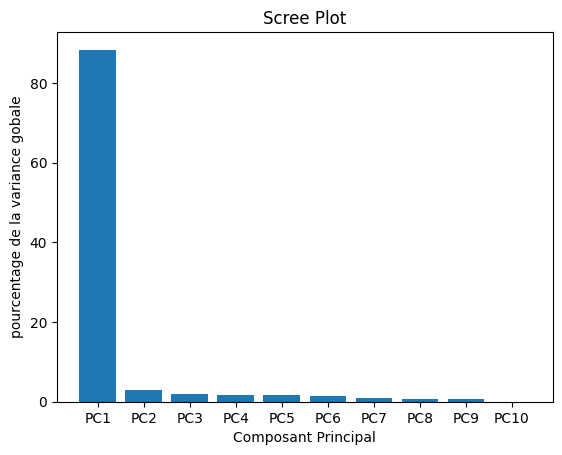

In [150]:
# Construction du Scree plot

plt.bar(x=labels,height=pc_var)
plt.ylabel('pourcentage de la variance gobale')
plt.xlabel('Composant Principal')
plt.title('Scree Plot')
plt.show()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.384843,2.355778,0.309938,-1.517460,-1.238833,-0.769389,0.060168,1.497630,-0.442480,1.149798e-15
wt2,8.884318,0.174394,-0.767108,0.335813,-1.118250,2.460463,-1.348689,-0.351066,0.589275,1.149798e-15
wt3,9.611732,-1.627900,-1.341110,-1.623673,1.221535,-0.696578,-0.327938,-1.063041,-0.963592,1.149798e-15
wt4,9.477122,-1.228773,-0.229860,2.713135,-0.002024,0.183649,1.363533,0.523550,-0.620457,1.149798e-15
wt5,9.609126,0.338474,1.967385,0.100432,1.030479,-1.115466,0.231292,-0.614176,1.464499,1.149798e-15
ko1,-9.444024,-0.118282,-0.585224,-1.621196,0.485354,1.569735,1.917751,0.108186,0.497918,1.149798e-15
ko2,-9.465233,-1.069081,2.244912,-0.148091,-2.096611,-0.146170,0.021066,-0.973944,-0.677399,1.149798e-15
ko3,-9.504527,3.100131,-1.864950,1.185846,-0.187549,-1.079915,-0.001189,-0.925920,0.047909,1.149798e-15
ko4,-9.068061,0.848800,1.414074,0.480865,2.328375,0.856628,-1.077823,0.685980,-0.665750,1.149798e-15
ko5,-9.485297,-2.773539,-1.148057,0.094328,-0.422476,-1.262956,-0.838170,1.112800,0.770079,1.149798e-15


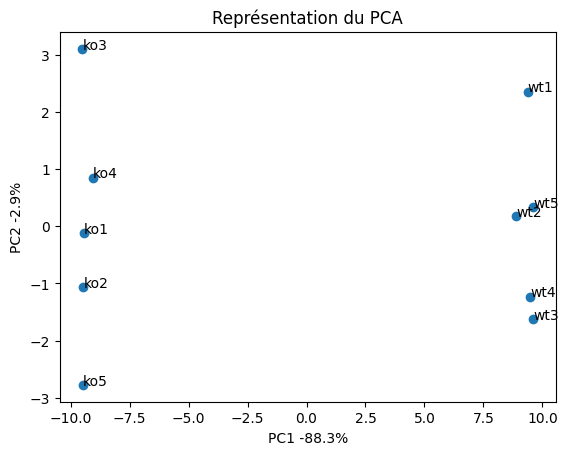

In [151]:
# construction d'un dataframe avec en index les nouvelles données 'scaled' et en colonne les PC's

pca_df= pd.DataFrame(pca_data, index=wt+ko,columns=labels)
display(pca_df)
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('Représentation du PCA')
plt.xlabel('PC1 -{0}%'.format(pc_var[0]))
plt.ylabel('PC2 -{0}%'.format(pc_var[1]))

for x in pca_df.index:
    plt.annotate(x,(pca_df.PC1.loc[x],pca_df.PC2.loc[x]))

plt.show()

In [152]:
loading_scores =pd.Series(pca.components_[0],index=genes)
print(loading_scores)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene1      0.103947
gene2     -0.105695
gene3     -0.097475
gene4      0.101022
gene5      0.103466
             ...   
gene96     0.105739
gene97     0.085007
gene98     0.066437
gene99     0.105886
gene100   -0.105914
Length: 100, dtype: float64
gene31   -0.106403
gene51    0.106373
gene19    0.106363
gene82   -0.106360
gene25    0.106349
gene58    0.106334
gene80    0.106328
gene9     0.106324
gene36    0.106322
gene95    0.106299
dtype: float64
